[View in Colaboratory](https://colab.research.google.com/github/fickas/mccain/blob/master/keras_2_6_clipped__v2.ipynb)

# clipped means clipped duration to 51. max should be 50 once call is placed.




<ul>
<li>Regression is done using different loss functions than what we used for classification. Mean squared error (MSE) is a loss function commonly used for regression.
<li>Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
<li>When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
<li>When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
<li>When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.
  </ul>




In [2]:
%%html
<style>
.h1_cell, .just_text {
    box-sizing: border-box;
    padding-top:5px;
    padding-bottom:5px;
    font-family: "Times New Roman", Georgia, Serif;
    font-size: 125%;
    line-height: 22px; /* 5px +12px + 5px */
    text-indent: 25px;
    background-color: #c8bbc8; /* #fbfbea; */
    padding: 10px;
}

hr { 
    display: block;
    margin-top: 0.5em;
    margin-bottom: 0.5em;
    margin-left: auto;
    margin-right: auto;
    border-style: inset;
    border-width: 4px;
}
</style>

<h1>
<font color="blue">My comments in blue</font>
</h1>
<div class=h1_cell>
<p>
Just testing.
</div>
<hr>

In [0]:
#get data

import pandas as pd

In [0]:
df_26 = pd.read_csv('https://www.dropbox.com/s/1b3yned4fac1kjx/df_26_v2.csv?raw=1')

In [5]:
df_26.head()

,month,day,dow,hour,minute,second,this_duration,last_phases,last_26_durations,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
0,7,19,3,14,35,29,15,"(2,)",(),2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,19,3,14,36,4,22,"(3,)","(15,)",3.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,19,3,14,37,3,13,"(4, 3, 5)","(15, 22)",17.0,15.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,19,3,14,37,32,10,"(2,)","(15, 22, 13)",2.0,15.0,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,19,3,14,37,56,17,"(1,)","(15, 22, 13, 10)",1.0,15.0,22.0,13.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_26 = df_26[10:]
df_26 = df_26.reset_index(drop=True)
df_26.head()

,month,day,dow,hour,minute,second,this_duration,last_phases,last_26_durations,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
0,7,19,3,14,41,41,10,"(1, 2)","(15, 22, 13, 10, 17, 13, 10, 19, 8, 26)",6.0,15.0,22.0,13.0,10.0,17.0,13.0,10.0,19.0,8.0,26.0
1,7,19,3,14,42,19,10,"(1, 4, 3, 5)","(22, 13, 10, 17, 13, 10, 19, 8, 26, 10)",19.0,22.0,13.0,10.0,17.0,13.0,10.0,19.0,8.0,26.0,10.0
2,7,19,3,14,42,58,21,"(1, 2)","(13, 10, 17, 13, 10, 19, 8, 26, 10, 10)",6.0,13.0,10.0,17.0,13.0,10.0,19.0,8.0,26.0,10.0,10.0
3,7,19,3,14,43,30,8,"(2,)","(10, 17, 13, 10, 19, 8, 26, 10, 10, 21)",2.0,10.0,17.0,13.0,10.0,19.0,8.0,26.0,10.0,10.0,21.0
4,7,19,3,14,43,50,35,"(1,)","(17, 13, 10, 19, 8, 26, 10, 10, 21, 8)",1.0,17.0,13.0,10.0,19.0,8.0,26.0,10.0,10.0,21.0,8.0


In [7]:
df_26.describe()

,month,day,dow,hour,minute,second,this_duration,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
count,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000
mean,7.433215,17.800647,1.763057,13.162071,29.585888,29.318749,128.627022,5.567093,122.001232,122.001541,122.001232,122.000462,122.002465,122.002927,122.031736,122.031890,122.032198,128.192420
std,0.495558,9.153106,1.285427,3.568815,17.342995,17.307753,2177.232153,5.263321,2119.973238,2119.973222,2119.973237,2119.973277,2119.973178,2119.973155,2119.972944,2119.972936,2119.972921,2176.970986
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,8.000000,1.000000,11.000000,15.000000,14.000000,14.000000,2.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
50%,7.000000,20.000000,2.000000,13.000000,29.000000,29.000000,22.000000,4.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
75%,8.000000,26.000000,3.000000,15.000000,45.000000,44.000000,29.000000,6.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
max,8.000000,31.000000,5.000000,23.000000,59.000000,59.000000,81131.000000,20.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000,81131.000000


In [8]:
#clip duration at 31. Reason is that 30 is longest it will be active *given* a call from other phase.

df_26['this_duration'][df_26['this_duration'] >= 31.] = 31.

df_26['this_duration'][df_26['this_duration'] < 5.] = 5.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
base = 'last_duration_'
for i in range(10):
  df_26[base+str(i)][df_26[base+str(i)] >= 31.] = 31.  #this means need to rebuild input data
  df_26[base+str(i)][df_26[base+str(i)] < 5.] = 5.  #this means need to rebuild input data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
df_26.describe()

,month,day,dow,hour,minute,second,this_duration,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
count,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000
mean,7.433215,17.800647,1.763057,13.162071,29.585888,29.318749,21.008935,5.567093,20.999692,21.000000,20.999692,20.998922,21.000924,21.001387,21.004160,21.004314,21.004622,21.008165
std,0.495558,9.153106,1.285427,3.568815,17.342995,17.307753,7.925787,5.263321,7.926084,7.925889,7.925889,7.926910,7.925773,7.925627,7.925976,7.925772,7.925733,7.925059
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,7.000000,8.000000,1.000000,11.000000,15.000000,14.000000,14.000000,2.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
50%,7.000000,20.000000,2.000000,13.000000,29.000000,29.000000,22.000000,4.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
75%,8.000000,26.000000,3.000000,15.000000,45.000000,44.000000,29.000000,6.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
max,8.000000,31.000000,5.000000,23.000000,59.000000,59.000000,31.000000,20.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000


In [0]:
import numpy as np

def get_train_test_inds(y,train_proportion=0.7):
    '''Generates indices, making random stratified split into training set and testing sets
    with proportions train_proportion and (1-train_proportion) of initial sample.
    y is any iterable indicating classes of each observation in the sample.
    Initial proportions of classes inside training and 
    testing sets are preserved (stratified sampling).
    '''

    y=np.array(y)
    train_inds = np.zeros(len(y),dtype=bool)
    test_inds = np.zeros(len(y),dtype=bool)
    values = np.unique(y)
    for value in values:
        value_inds = np.nonzero(y==value)[0]
        np.random.shuffle(value_inds)
        n = int(train_proportion*len(value_inds))

        train_inds[value_inds[:n]]=True
        test_inds[value_inds[n:]]=True

    return train_inds,test_inds
  
#df[train_inds] and df[test_inds] give you the training and testing sets of your original DataFrame df.

In [0]:
#y = df_26.pop('this_duration')

train_indices, test_indices = get_train_test_inds(df_26['this_duration'],train_proportion=0.7)

In [14]:
train_indices[:10]

array([ True,  True,  True,  True, False, False,  True, False,  True,
        True])

In [15]:
test_indices[:10]

array([False, False, False, False,  True,  True, False,  True, False,
       False])

In [0]:
df_26_train = df_26[train_indices]

In [0]:
df_26_test = df_26[test_indices]

In [0]:
'''
from sklearn.model_selection import train_test_split 


y = df_26.pop('this_duration')
X = df_26

X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.25)

df_X = X.iloc[X_train] # return dataframe train
'''

In [0]:
train_target = df_26_train['this_duration'].values

In [19]:
train_target.shape

(4532,)

In [0]:
df_26_train = df_26_train.drop('this_duration', axis=1)

In [0]:
df_26_train = df_26_train.drop(['last_phases',	'last_26_durations'], axis=1)

In [22]:
df_26_train.head(1)

,month,day,dow,hour,minute,second,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
0,7,19,3,14,41,41,6.0,15.0,22.0,13.0,10.0,17.0,13.0,10.0,19.0,8.0,26.0


In [0]:
train_input = df_26_train.values

In [24]:
train_input.shape

(4532, 17)

In [0]:
test_target = df_26_test['this_duration'].values

In [0]:
df_26_test = df_26_test.drop(['this_duration','last_phases',	'last_26_durations'], axis=1)

In [0]:
test_input = df_26_test.values

<hr>
```
#for each feature, take mean, subtract mean to get a mean of 0, then divide by std to get std of 1
#numpy makes it easy to map these operations across all features.


mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

print(train_data[:10])
print(test_data[:10])
```
<hr>

In [28]:
print(train_input[0][:10])
mean = train_input.mean(axis=0)
train_input -= mean
print(train_input[0][:10])

[ 7. 19.  3. 14. 41. 41.  6. 15. 22. 13.]
[-0.4298323   1.14982348  1.23654016  0.79148279 11.59863195 11.80538394
  0.38812886 -6.03420124  1.04435128 -8.07369815]


In [29]:
std = train_input.std(axis=0)
train_input /= std
print(train_input[0][:10])

[-0.86825686  0.12576409  0.9568642   0.22683164  0.67256212  0.68818992
  0.07352224 -0.75903231  0.13207222 -1.02167422]


In [30]:
std

array([ 0.49505201,  9.14270106,  1.29228385,  3.48929618, 17.24544346,
       17.15425286,  5.27906742,  7.94986079,  7.90742561,  7.90241934,
        7.89845532,  7.93991885,  7.91865409,  7.90726132,  7.90519862,
        7.89290396,  7.87302894])

In [31]:
print(test_input[0][:10])
mean = test_input.mean(axis=0)
test_input -= mean
print(test_input[0][:10])

[ 7. 19.  3. 14. 43. 50.  1. 17. 13. 10.]
[ -0.44104135   1.31393568   1.23787647   0.9453803   12.98723839
  20.39407861  -4.46350179  -3.91985707  -8.10260337 -10.82848392]


In [32]:
std = test_input.std(axis=0)
test_input /= std
print(test_input[0][:10])

[-0.88827985  0.14322732  0.97540404  0.25255692  0.73981143  1.15546696
 -0.85444074 -0.49819078 -1.01721455 -1.35775597]


In [33]:
train_input[:3]

array([[-0.86825686,  0.12576409,  0.9568642 ,  0.22683164,  0.67256212,
         0.68818992,  0.07352224, -0.75903231,  0.13207222, -1.02167422,
        -1.39815287, -0.51059212, -1.00263769, -1.37522048, -0.26248829,
        -1.64869845,  0.64572965],
       [-0.86825686,  0.12576409,  0.9568642 ,  0.22683164,  0.73054845,
        -0.59429088,  2.5360784 ,  0.12148625, -1.00609846, -1.4013048 ,
        -0.51190364, -1.01437561, -1.38148995, -0.23702615, -1.65397768,
         0.63183101, -1.38652505],
       [-0.86825686,  0.12576409,  0.9568642 ,  0.22683164,  0.73054845,
         1.67919782,  0.07352224, -1.01060905, -1.38548869, -0.51550012,
        -1.01833177, -1.39221322, -0.24493317, -1.62815256,  0.62300496,
        -1.39530629, -1.38652505]])

In [34]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_input.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


Using TensorFlow backend.


In [0]:
#k-fold on training

k = 4
num_val_samples = len(train_input) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_input[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_input[:i * num_val_samples],
         train_input[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)


processing fold # 0


In [34]:
all_scores
#[2.588258957792037, 3.1289568449719116, 3.1856116051248984, 3.0763342615401386]


[10.883906271605365, 11.408363116103992, 9.96682024424055, 12.423224332691294]

In [35]:
np.mean(all_scores)
#2.9947904173572462

11.170578491160299

In [0]:
#now build with full training and save
model_full = build_model()
history_full = model_full.fit(train_input, train_target,
          epochs=100, batch_size=1, verbose=0)


In [0]:
mae_history = history_full.history['mean_absolute_error']  #mae for each epoch

In [52]:
mae_history.index(min(mae_history))

99

In [53]:
mae_history[90:110]  #looks like it was continuing to go down at epoch 99 - try larger epoch to see if continues

[7.4423295246816314,
 7.375914681168784,
 7.435148563954683,
 7.397457804300089,
 7.409299552335148,
 7.364605189002721,
 7.361458156383143,
 7.322249779659035,
 7.302200444820708,
 7.287839438640966]

In [0]:
val_mse, val_mae = model_full.evaluate(train_input, train_target, verbose=0)

In [39]:
val_mae

7.257545872916163

In [0]:
tval_mse, tval_mae = model_full.evaluate(test_input, test_target, verbose=0)

In [41]:
tval_mae

10.510297655756856

In [0]:
from keras.models import load_model

model_full.save('100_725_1051.h5')  # creates a HDF5 file

# returns a compiled model
# identical to the previous one
#model = load_model('4_100_1.h5')

In [0]:
#now build with full training and save
model_full2 = build_model()
history2_full = model_full2.fit(train_input, train_target,
          epochs=500, batch_size=1, verbose=0)

In [59]:
mae_history2 = history2_full.history['mean_absolute_error']  #mae for each epoch
print((min(mae_history2), mae_history2.index(min(mae_history2))))

(6.033143527528881, 490)


<pre>
100 4 fold = 11.170578491160299

 full train = 7.257545872916163
 full test = 10.510297655756856

250 = (6.150688187210961, 243)

[6.184894781197067,
 6.174423328332141,
 6.1951193345331514,
 6.150688187210961,
 6.197499098819969,
 6.185656473910914,
 6.157997042942891,
 6.177618943695474,
 6.185150342704976,
 6.190723727023707]
 
 500 = 6.033143527528881, 490
 
 full train = 5.857304525797346
 full test = 11.77185241441809
 
 </pre>

In [61]:
mae_history2[485:]

[6.034996051070965,
 6.053697869629986,
 6.071950741784763,
 6.0441614868366615,
 6.048079902091913,
 6.033143527528881,
 6.054813715630928,
 6.086161141479965,
 6.062651821997314,
 6.100719222136304,
 6.081115469046399,
 6.053502783311152,
 6.091343568278625,
 6.070001509970268,
 6.089441236352498]

In [0]:
val_mse2, val_mae2 = model_full2.evaluate(train_input, train_target, verbose=0)

In [63]:
val_mae2

5.857304525797346

In [64]:
tval_mse2, tval_mae2 = model_full2.evaluate(test_input, test_target, verbose=0)
tval_mae2

11.77185241441809

In [36]:
#try for 250 epochs and more monitoring

num_epochs = 250

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_input[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_target[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_input = np.concatenate(
        [train_input[:i * num_val_samples],
         train_input[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
model.save('4_250_1.h5')  # creates a HDF5 file

In [37]:
all_mae_histories[0][:10]

[9.45253214034359,
 9.09430641663813,
 9.280323578826094,
 9.66068073711564,
 9.196015346999717,
 9.69879515487536,
 9.307971257235097,
 9.535667178905115,
 9.048183948381812,
 9.623705510333576]

In [0]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

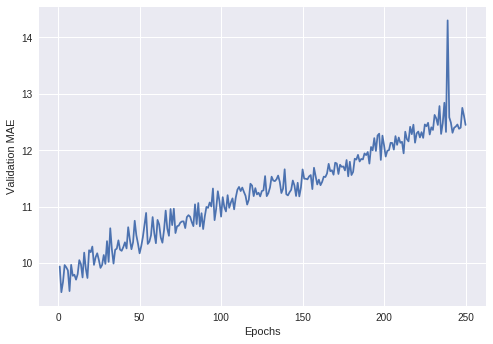

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [0]:
average_mae_history[:25]

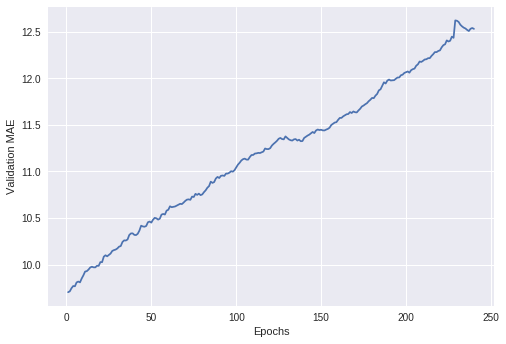

In [40]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [41]:
#now that know where to set epochs, go back and train on full training data.

new_epochs = 10
batch_size = 1

model = build_model()
model.fit(train_input, train_target,
          epochs=new_epochs, batch_size=batch_size, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_input, test_target)



1971/1971 [==============================] - 0s 79us/step


In [42]:
print((test_mse_score, test_mae_score))

(151.94027888018852, 9.450068247372702)


In [0]:
model = build_model()
model.fit(train_input, train_target,
          epochs=20, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_input, test_target)

test_mae_score

177/177 [==============================] - 0s 840us/step


10.891290675448833

In [0]:
predictions = model.predict(test_input)

In [44]:
predictions[:10]

array([[25.796   ],
       [21.701513],
       [20.616594],
       [18.34076 ],
       [20.49483 ],
       [21.838705],
       [19.683733],
       [22.834265],
       [20.145742],
       [22.193132]], dtype=float32)

In [0]:
diffs = []
for i in range(len(test_target)):
  actual = test_target[i]
  pred = predictions[i][0]
  diffs.append(pred-actual)
          

In [46]:
diffs[:10]  #negative is under-estimating

[15.795999526977539,
 -13.298486709594727,
 3.6165943145751953,
 -32.65924072265625,
 7.494829177856445,
 -11.161294937133789,
 -17.316267013549805,
 -10.165735244750977,
 1.145742416381836,
 -20.806867599487305]

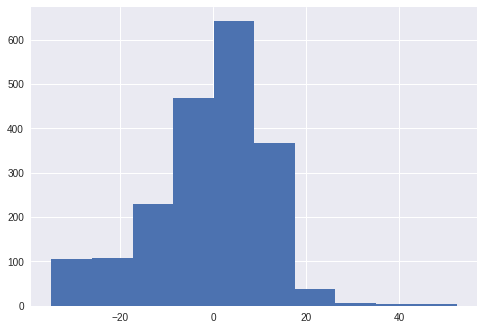

In [47]:

plt.hist(diffs)
plt.show()

In [48]:
over = [x for x in diffs if x>0]
over_average = sum(over)/len(over)
over_average

7.950841824662663

In [49]:
under = [x for x in diffs if x<0]
under_average = sum(under)/len(under)
under_average

-11.201639676907144

predict less than actual at average of 14.23. Rider has to wait longer than we predict.

Not so good.

Both are roughly equal in terms of numbers of over and under predictions.

In [50]:
(len(over),len(under))  #over predicting at roughly 10% more

(1062, 909)

In [51]:
df_26.describe()

,month,day,dow,hour,minute,second,this_duration,last_phases_map,last_duration_0,last_duration_1,last_duration_2,last_duration_3,last_duration_4,last_duration_5,last_duration_6,last_duration_7,last_duration_8,last_duration_9
count,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000,6491.000000
mean,7.433215,17.800647,1.763057,13.162071,29.585888,29.318749,23.414574,5.567093,23.396087,23.396395,23.396087,23.395317,23.397319,23.397782,23.403636,23.403790,23.404098,23.410723
std,0.495558,9.153106,1.285427,3.568815,17.342995,17.307753,11.995013,5.263321,11.983493,11.983303,11.983365,11.984194,11.983041,11.982852,11.987053,11.986887,11.986800,11.990167
min,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,8.000000,1.000000,11.000000,15.000000,14.000000,14.000000,2.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
50%,7.000000,20.000000,2.000000,13.000000,29.000000,29.000000,22.000000,4.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
75%,8.000000,26.000000,3.000000,15.000000,45.000000,44.000000,29.000000,6.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
max,8.000000,31.000000,5.000000,23.000000,59.000000,59.000000,51.000000,20.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000


In [56]:
vc = df_26['this_duration'].value_counts()
vc

51    464
9     385
22    364
19    344
12    332
23    331
11    302
16    270
14    265
17    255
25    250
8     241
20    235
29    222
32    219
26    207
28    205
15    186
35    185
13    151
31    102
34     97
38     74
18     73
10     71
24     71
21     68
41     65
30     45
37     41
33     35
44     31
36     31
42     29
46     26
39     26
49     24
43     24
40     23
6      23
45     22
27     20
48     19
47     18
50     15
7       3
5       1
0       1
Name: this_duration, dtype: int64

In [59]:
vc[9]

385

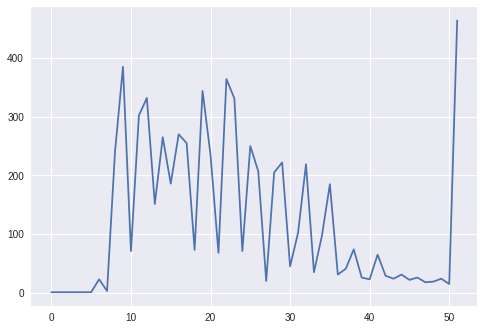

In [60]:

lists = sorted(vc.items()) # sorted by key, return a list of tuples

xa, ya = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(xa, ya)
plt.show()

GET MORE DATA BEFORE MESSING WITH HYPER PARAMS